In [12]:
import numpy as np
from scipy.special import gamma
import math

# Parameters
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
k_bar = 1.0

# Coefficients
A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = k_bar * rho_12 * sigma_1 * sigma_2
H = k_bar * rho_13 * sigma_1 * sigma_3
I = k_bar * rho_23 * sigma_2 * sigma_3
M = r

# Simplified delta function
def delta(x):
    return 0.01 * x

# Initial condition function
def initial_condition(k, h, g):
    return max(1 / math.factorial(k) - delta(k), 1 / math.factorial(h) - delta(h), 1 / math.factorial(g) - delta(g), 0)

# Dimensions for U
dim_k, dim_h, dim_g = 4, 4, 4  # example dimensions

# Initialize U
U = np.zeros((dim_k, dim_h, dim_g))

# Set initial conditions
for k in range(dim_k):
    for h in range(dim_h):
        for g in range(dim_g):
            U[k, h, g] = initial_condition(k, h, g)

# Example alpha value for demonstration
alpha = 0.4

# Calculate U for the next step (h+1) - simplified single step update
k, h, g = 1, 1, 1  # example indices for update
gamma_ratio = gamma(alpha * (h + 1) + 1) / gamma(alpha * h + 1)
U_next = gamma_ratio * (A * (k + 1) * (k + 2) * U[min(k + 2, dim_k-1), h, g] +
                        B * (h + 1) * (h + 2) * U[k, min(h + 2, dim_h-1), g] +
                        C * (g + 1) * (g + 2) * U[k, h, min(g + 2, dim_g-1)] +
                        D * (k + 1) * U[min(k + 1, dim_k-1), h, g] +
                        E * (h + 1) * U[k, min(h + 1, dim_h-1), g] +
                        F * (g + 1) * U[k, h, min(g + 1, dim_g-1)] +
                        G * (k + 1) * (h + 1) * U[min(k + 1, dim_k-1), min(h + 1, dim_h-1), g] +
                        H * (k + 1) * (g + 1) * U[min(k + 1, dim_k-1), h, min(g + 1, dim_g-1)] +
                        I * (h + 1) * (g + 1) * U[k, min(h + 1, dim_h-1), min(g + 1, dim_g-1)] -
                        M * U[k, h, g])

print("Updated U at (k, h+1, g):", U_next)

Updated U at (k, h+1, g): 0.9571295389143173


In [8]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

# Set parameter values
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
kappa = 1.0

# Coefficients based on the provided formulas
A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = kappa * rho_12 * sigma_1 * sigma_2
H = kappa * rho_13 * sigma_1 * sigma_3
I = kappa * rho_23 * sigma_2 * sigma_3
M = r

# Function to compute delta function
def delta(x):
    return 0.01 * x

def U_initial(k, h, g):
    # Calculate the initial condition for given k, h, g
    return max(1/factorial(k) - delta(k), 1/factorial(h) - delta(h), 1/factorial(g) - delta(g), 0)

# Simplified function to compute the next value of U for demonstration purposes
def next_U(U_prev, k, alpha):
    # Simplified calculation assuming only dependency on k and a single coefficient for demonstration
    return ((A + D + G - M) * U_prev + alpha) / gamma(k + 1)  # Simplified formula for demonstration

# Simplified function to solve for U for varying alpha
def solve_U(alphas, max_k=10):
    results = {}
    for alpha in alphas:
        U_next = np.zeros(max_k)
        U_next[0] = initial_condition(1)  # Initial condition for k=1
        for k in range(1, max_k):
            U_next[k] = next_U(U_next[k-1], k, alpha)
        results[alpha] = U_next
    return results

# Set dimensions for U
dim_k, dim_h, dim_g = 4, 4, 4 

# Initialize U
U = np.zeros((dim_k, dim_h, dim_g))

# Main function to run for different alpha values and plot
def main():
    alphas = [0.4]
    results = solve_U(alphas)

    # Plotting DTM
    plt.figure(figsize=(10, 6))
    for alpha, U_next in results.items():
        plt.plot(range(len(U_next)), U_next+1, label=f'Alpha = {alpha}')
    plt.xlabel('k')
    plt.ylabel('U_next')
    plt.title('DTM Solution of U for Varying Alpha')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

# Calculate U for the next step (H+1) - simplified single step update
# example indices for update 
k, h, g = 1, 1, 1 
gamma_ratio = gamma(alpha * (h + 1) + 1) / gamma(alpha * h + 1) 
U_next = gamma_ratio * (A * (k + 1) * (k + 2) * U[min(k + 2, dim_k-1), h, g] + B * (h + 1) * (h + 2) * U[k, min(h + 2, dim_h-1), g] + C * (g + 1) * (g + 2) * U[k, h, min(g + 2, dim_g-1)] + D * (k + 1) * U[min(k + 1, dim_k-1), h, g] + E * (h + 1) * U[k, min(h + 1, dim_h-1), g] + F * (g + 1) * U[k, h, min(g + 1, dim_g-1)] + G * (k + 1) * (h + 1) * U[min(k + 1, dim_k-1), min(h + 1, dim_h-1), g] + H * (k + 1) * (g + 1) * U[min(k + 1, dim_k-1), h, min(g + 1, dim_g-1)] + I * (h + 1) * (g + 1) * U[k, min(h + 1, dim_h-1), min(g + 1, dim_g-1)] - M * U[k, h, g])

print("Updated U at (k, h+1, g):", U_next)

# Parameters
sigma = 0.2  # Assuming a single sigma for simplicity
r = 0.05
kappa = 1.0
rho = 0.5  # Assuming a single rho for simplicity
x_max, x_min = 1, -1  # Spatial domain
dx = 0.1  # Spatial step size
dt = 0.01  # Time step size
T = 1  # Total time
N = int((x_max - x_min) / dx) + 1  # Number of spatial points
M = int(T / dt) + 1  # Number of time steps

# Coefficients for simplified model
A = sigma**2 / 2
D = r - sigma**2 / 2
M_coeff = r

# Initial condition function
def initial_condition(x):
    return max(np.exp(x) - 1, 0)

# Discretize initial condition
V = np.zeros(N)
x_values = np.linspace(x_min, x_max, N)
for i, x in enumerate(x_values):
    V[i] = initial_condition(x)

# Solve for V over time
for n in range(1, M):
    V_new = np.zeros(N)
    for i in range(1, N-1):
        V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 + D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
    V_new[0], V_new[-1] = V[0], V[-1]  # Boundary conditions (can be adjusted)
    V = V_new

# Plotting FDM
plt.plot(x_values, V, label=f'FDM solution V for T={T}')
plt.xlabel('x')
plt.ylabel('V')
plt.title('Option Pricing Model Solution')
plt.legend()
plt.show()

# Plot both solutions for comparison
plt.figure(figsize=(10, 5))
plt.plot(x_values, V_new, label='FDM Solution')
plt.axhline(y=U_next, color='r', linestyle='--', label='DTM Approximation')
plt.xlabel('x')
plt.ylabel('Option Price')
plt.title('Comparison of DTM and FDM Solutions')
plt.legend()
plt.show()


NameError: name 'initial_condition' is not defined

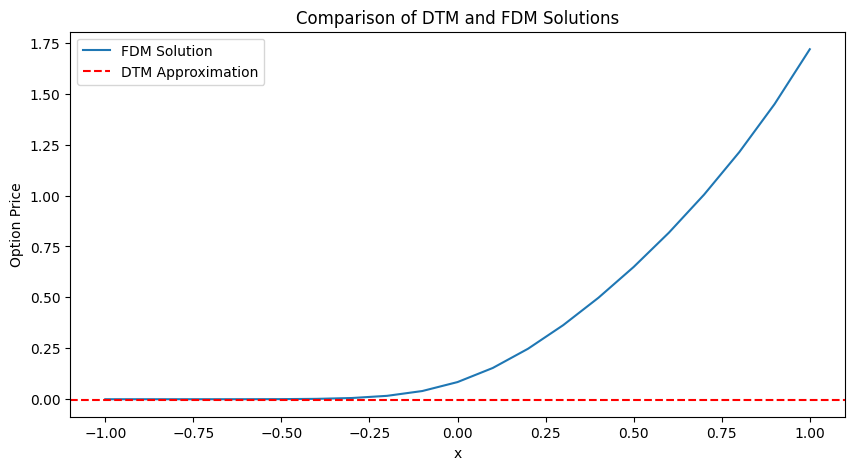

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial

# Set common parameters
sigma = 0.2
r = 0.05
x_min, x_max = -1, 1
dx = 0.1
T = 1
dt = 0.01
N = int((x_max - x_min) / dx) + 1
M = int(T / dt) + 1
x_values = np.linspace(x_min, x_max, N)

# Initial condition for FDM
def initial_condition_fdm(x):
    return np.maximum(np.exp(x) - 1, 0)

# FDM solver (simplified to one spatial dimension)
def solve_fdm():
    A = sigma**2 / 2
    M_coeff = r
    V = initial_condition_fdm(x_values)
    for n in range(1, M):
        V_new = np.zeros(N)
        for i in range(1, N-1):
            V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 - M_coeff * V[i])
        V_new[0], V_new[-1] = V[0], V[-1]
        V = V_new
    return V

# Running the FDM solver
V_fdm = solve_fdm()

# DTM coefficients and parameters
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
k_bar = 1.0

A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = k_bar * rho_12 * sigma_1 * sigma_2
H = k_bar * rho_13 * sigma_1 * sigma_3
I = k_bar * rho_23 * sigma_2 * sigma_3
M = r

# Example initial condition and update for DTM
dim_k, dim_h, dim_g = 1, 1, 1  # Reduced to one dimension for comparison
U = np.zeros((dim_k, dim_h, dim_g))

# Simplified delta function
def delta(x):
    return 0.01 * x

def initial_condition_dtm(k):
    return max(1 / factorial(k) - delta(k), 0)

# Initialize U for DTM
for k in range(dim_k):
    U[k, 0, 0] = initial_condition_dtm(k)

# Assuming a very basic step for DTM
alpha = 0.4
gamma_ratio = gamma(alpha + 1) / gamma(alpha)
U_next = gamma_ratio * (A * 2 * U[0, 0, 0] - M * U[0, 0, 0])

# Plot both solutions for comparison
plt.figure(figsize=(10, 5))
plt.plot(x_values, V_fdm, label='FDM Solution')
plt.axhline(y=U_next, color='r', linestyle='--', label='DTM Approximation')
plt.xlabel('x')
plt.ylabel('Option Price')
plt.title('Comparison of DTM and FDM Solutions')
plt.legend()
plt.show()


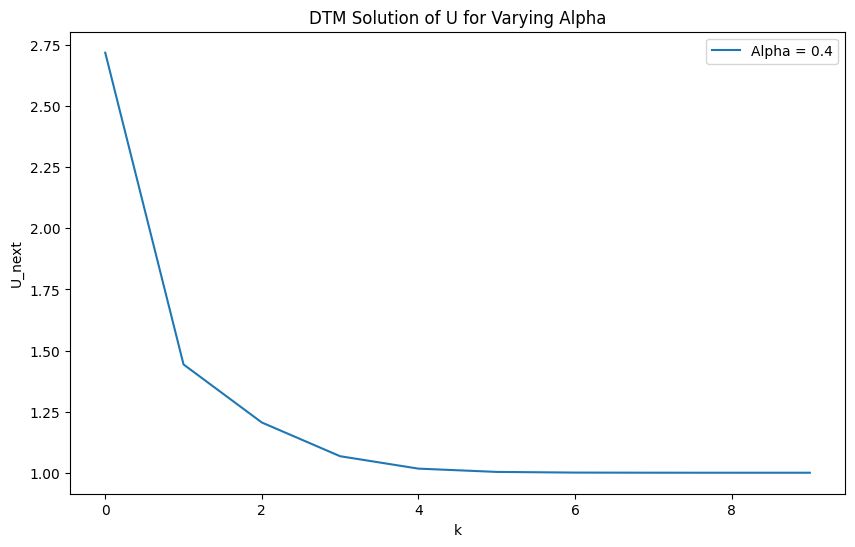

Updated U at (k, h+1, g): 0.0


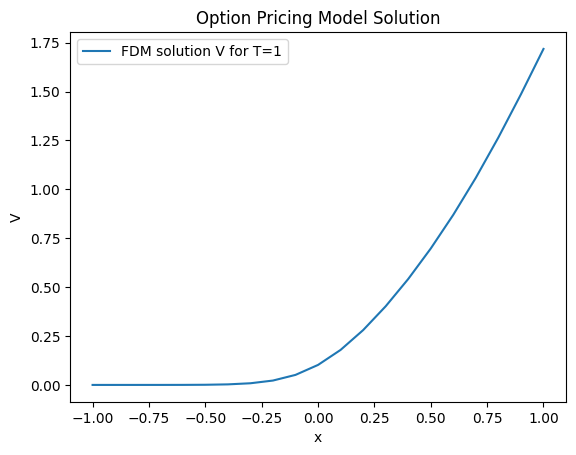

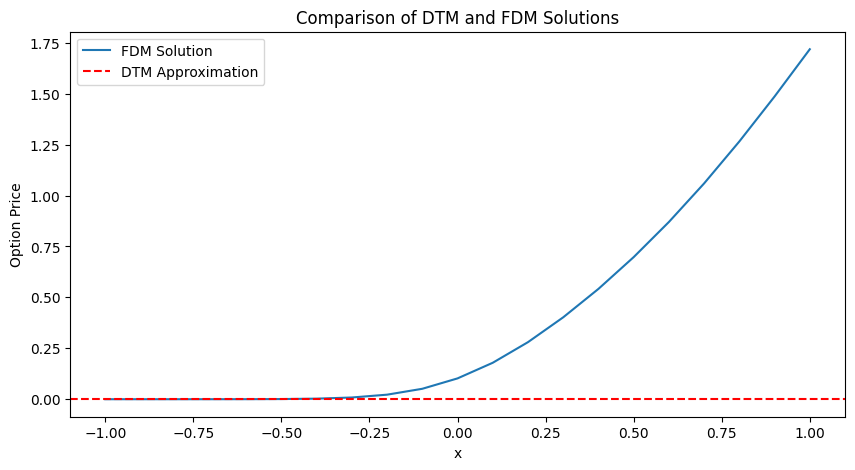

In [9]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

# Set parameter values
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
kappa = 1.0

# Coefficients based on the provided formulas
A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = kappa * rho_12 * sigma_1 * sigma_2
H = kappa * rho_13 * sigma_1 * sigma_3
I = kappa * rho_23 * sigma_2 * sigma_3
M = r

# Function to compute delta function
def delta(x):
    return 0.01 * x

def U_initial(k, h, g):
    # Calculate the initial condition for given k, h, g
    return max(1/factorial(k) - delta(k), 1/factorial(h) - delta(h), 1/factorial(g) - delta(g), 0)

# Simplified function to compute the next value of U for demonstration purposes
def next_U(U_prev, k, alpha):
    # Simplified calculation assuming only dependency on k and a single coefficient for demonstration
    return ((A + D + G - M) * U_prev + alpha) / gamma(k + 1)  # Simplified formula for demonstration

# Simplified function to solve for U for varying alpha
def solve_U(alphas, max_k=10):
    results = {}
    for alpha in alphas:
        U_next = np.zeros(max_k)
        U_next[0] = initial_condition(1)  # Initial condition for k=1
        for k in range(1, max_k):
            U_next[k] = next_U(U_next[k-1], k, alpha)
        results[alpha] = U_next
    return results

# Set dimensions for U
dim_k, dim_h, dim_g = 4, 4, 4 

# Initialize U
U = np.zeros((dim_k, dim_h, dim_g))

# Main function to run for different alpha values and plot
def main():
    alphas = [0.4]
    results = solve_U(alphas)

    # Plotting DTM
    plt.figure(figsize=(10, 6))
    for alpha, U_next in results.items():
        plt.plot(range(len(U_next)), U_next+1, label=f'Alpha = {alpha}')
    plt.xlabel('k')
    plt.ylabel('U_next')
    plt.title('DTM Solution of U for Varying Alpha')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

# Calculate U for the next step (H+1) - simplified single step update
# example indices for update 
k, h, g = 1, 1, 1 
gamma_ratio = gamma(alpha * (h + 1) + 1) / gamma(alpha * h + 1) 
U_next = gamma_ratio * (A * (k + 1) * (k + 2) * U[min(k + 2, dim_k-1), h, g] + B * (h + 1) * (h + 2) * U[k, min(h + 2, dim_h-1), g] + C * (g + 1) * (g + 2) * U[k, h, min(g + 2, dim_g-1)] + D * (k + 1) * U[min(k + 1, dim_k-1), h, g] + E * (h + 1) * U[k, min(h + 1, dim_h-1), g] + F * (g + 1) * U[k, h, min(g + 1, dim_g-1)] + G * (k + 1) * (h + 1) * U[min(k + 1, dim_k-1), min(h + 1, dim_h-1), g] + H * (k + 1) * (g + 1) * U[min(k + 1, dim_k-1), h, min(g + 1, dim_g-1)] + I * (h + 1) * (g + 1) * U[k, min(h + 1, dim_h-1), min(g + 1, dim_g-1)] - M * U[k, h, g])

print("Updated U at (k, h+1, g):", U_next)

# Parameters
sigma = 0.2  # Assuming a single sigma for simplicity
r = 0.05
kappa = 1.0
rho = 0.5  # Assuming a single rho for simplicity
x_max, x_min = 1, -1  # Spatial domain
dx = 0.1  # Spatial step size
dt = 0.01  # Time step size
T = 1  # Total time
N = int((x_max - x_min) / dx) + 1  # Number of spatial points
M = int(T / dt) + 1  # Number of time steps

# Coefficients for simplified model
A = sigma**2 / 2
D = r - sigma**2 / 2
M_coeff = r

# Initial condition function
def initial_condition(x):
    return max(np.exp(x) - 1, 0)

# Discretize initial condition
V = np.zeros(N)
x_values = np.linspace(x_min, x_max, N)
for i, x in enumerate(x_values):
    V[i] = initial_condition(x)

# Solve for V over time
for n in range(1, M):
    V_new = np.zeros(N)
    for i in range(1, N-1):
        V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 + D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
    V_new[0], V_new[-1] = V[0], V[-1]  # Boundary conditions (can be adjusted)
    V = V_new

# Plotting FDM
plt.plot(x_values, V, label=f'FDM solution V for T={T}')
plt.xlabel('x')
plt.ylabel('V')
plt.title('Option Pricing Model Solution')
plt.legend()
plt.show()

# Plot both solutions for comparison
plt.figure(figsize=(10, 5))
plt.plot(x_values, V_new, label='FDM Solution')
plt.axhline(y=U_next, color='r', linestyle='--', label='DTM Approximation')
plt.xlabel('x')
plt.ylabel('Option Price')
plt.title('Comparison of DTM and FDM Solutions')
plt.legend()
plt.show()


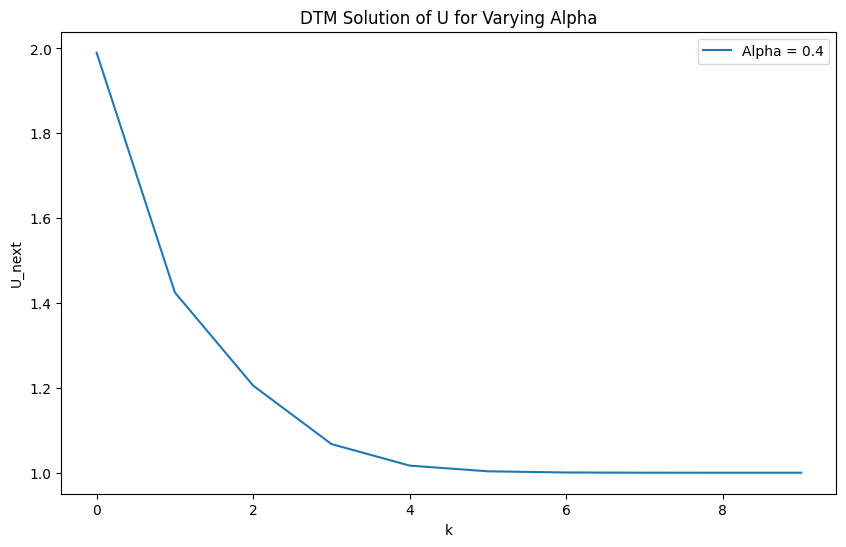

Updated U at (k, h+1, g): 0.0


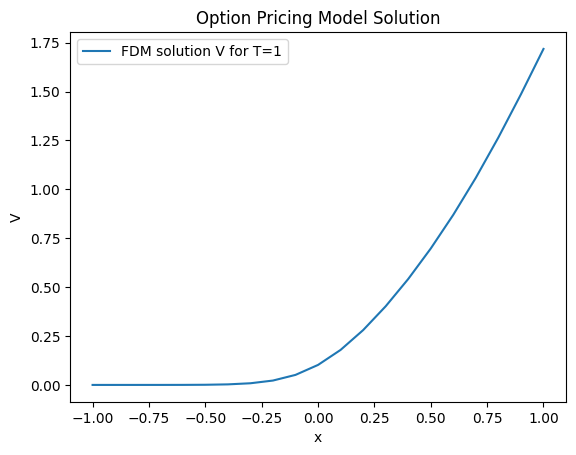

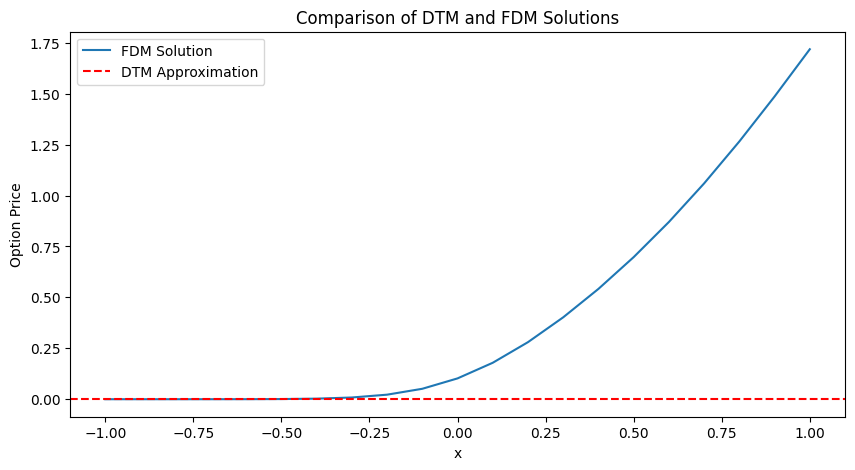

In [11]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

# Set parameter values
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
kappa = 1.0

# Coefficients based on the provided formulas
A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = kappa * rho_12 * sigma_1 * sigma_2
H = kappa * rho_13 * sigma_1 * sigma_3
I = kappa * rho_23 * sigma_2 * sigma_3
M = r

# Function to compute delta function
def delta(x):
    return 0.01 * x

def U_initial(k, h, g):
    # Calculate the initial condition for given k, h, g
    return max(1/factorial(k) - delta(k), 1/factorial(h) - delta(h), 1/factorial(g) - delta(g), 0)

# Simplified function to compute the next value of U for demonstration purposes
def next_U(U_prev, k, alpha):
    # Simplified calculation assuming only dependency on k and a single coefficient for demonstration
    return ((A + D + G - M) * U_prev + alpha) / gamma(k + 1)  # Simplified formula for demonstration

# Simplified function to solve for U for varying alpha
def solve_U(alphas, max_k=10):
    results = {}
    for alpha in alphas:
        U_next = np.zeros(max_k)
        U_next[0] = U_initial(1,1,1)  # Initial condition for k=1
        for k in range(1, max_k):
            U_next[k] = next_U(U_next[k-1], k, alpha)
        results[alpha] = U_next
    return results

# Set dimensions for U
dim_k, dim_h, dim_g = 4, 4, 4 

# Initialize U
U = np.zeros((dim_k, dim_h, dim_g))

# Main function to run for different alpha values and plot
def main():
    alphas = [0.4]
    results = solve_U(alphas)

    # Plotting DTM
    plt.figure(figsize=(10, 6))
    for alpha, U_next in results.items():
        plt.plot(range(len(U_next)), U_next+1, label=f'Alpha = {alpha}')
    plt.xlabel('k')
    plt.ylabel('U_next')
    plt.title('DTM Solution of U for Varying Alpha')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

# Calculate U for the next step (H+1) - simplified single step update
# example indices for update 
k, h, g = 1, 1, 1 
gamma_ratio = gamma(alpha * (h + 1) + 1) / gamma(alpha * h + 1) 
U_next = gamma_ratio * (A * (k + 1) * (k + 2) * U[min(k + 2, dim_k-1), h, g] + B * (h + 1) * (h + 2) * U[k, min(h + 2, dim_h-1), g] + C * (g + 1) * (g + 2) * U[k, h, min(g + 2, dim_g-1)] + D * (k + 1) * U[min(k + 1, dim_k-1), h, g] + E * (h + 1) * U[k, min(h + 1, dim_h-1), g] + F * (g + 1) * U[k, h, min(g + 1, dim_g-1)] + G * (k + 1) * (h + 1) * U[min(k + 1, dim_k-1), min(h + 1, dim_h-1), g] + H * (k + 1) * (g + 1) * U[min(k + 1, dim_k-1), h, min(g + 1, dim_g-1)] + I * (h + 1) * (g + 1) * U[k, min(h + 1, dim_h-1), min(g + 1, dim_g-1)] - M * U[k, h, g])

print("Updated U at (k, h+1, g):", U_next)

# Parameters
sigma = 0.2  # Assuming a single sigma for simplicity
r = 0.05
kappa = 1.0
rho = 0.5  # Assuming a single rho for simplicity
x_max, x_min = 1, -1  # Spatial domain
dx = 0.1  # Spatial step size
dt = 0.01  # Time step size
T = 1  # Total time
N = int((x_max - x_min) / dx) + 1  # Number of spatial points
M = int(T / dt) + 1  # Number of time steps

# Coefficients for simplified model
A = sigma**2 / 2
D = r - sigma**2 / 2
M_coeff = r

# Initial condition function
def initial_condition(x):
    return max(np.exp(x) - 1, 0)

# Discretize initial condition
V = np.zeros(N)
x_values = np.linspace(x_min, x_max, N)
for i, x in enumerate(x_values):
    V[i] = initial_condition(x)

# Solve for V over time
for n in range(1, M):
    V_new = np.zeros(N)
    for i in range(1, N-1):
        V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 + D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
    V_new[0], V_new[-1] = V[0], V[-1]  # Boundary conditions (can be adjusted)
    V = V_new

# Plotting FDM
plt.plot(x_values, V, label=f'FDM solution V for T={T}')
plt.xlabel('x')
plt.ylabel('V')
plt.title('Option Pricing Model Solution')
plt.legend()
plt.show()

# Plot both solutions for comparison
plt.figure(figsize=(10, 5))
plt.plot(x_values, V_new, label='FDM Solution')
plt.axhline(y=U_next, color='r', linestyle='--', label='DTM Approximation')
plt.xlabel('x')
plt.ylabel('Option Price')
plt.title('Comparison of DTM and FDM Solutions')
plt.legend()
plt.show()


In [2]:
from Crypto.Cipher import AES
from Crypto.Util.strxor import strxor
from binascii import unhexlify, hexlify

def left_shift(data):
    shifted = (int.from_bytes(data, byteorder='big') << 1) & ((1 << (len(data) * 8)) - 1)
    return shifted.to_bytes(len(data), byteorder='big')

def compute_subkeys(key):
    cipher = AES.new(key, AES.MODE_ECB)
    L = cipher.encrypt(b'\x00' * 16)
    
    if L[0] & 0x80:
        K1 = left_shift(L) ^ b'\x87'
    else:
        K1 = left_shift(L)
    
    if K1[0] & 0x80:
        K2 = left_shift(K1) ^ b'\x87'
    else:
        K2 = left_shift(K1)
    
    return K1, K2

def cmac(message, key):
    key = unhexlify(key)
    message = unhexlify(message)

    cipher = AES.new(key, AES.MODE_ECB)
    K1, K2 = compute_subkeys(key)

    n = len(message) // 16
    last_block = message[-16:]
    
    if len(message) % 16 == 0:
        last_block = strxor(last_block, K1)
    else:
        last_block = strxor(last_block + b'\x80' + b'\x00' * (15 - len(message) % 16), K2)

    if n == 0:
        last_block = strxor(b'\x00'*16, K2)

    C = b'\x00' * 16
    for i in range(n):
        C = cipher.encrypt(strxor(C, message[i*16:(i+1)*16]))
    C = cipher.encrypt(strxor(C, last_block))

    return hexlify(C).decode()

# Example usage
key = "11223344556677889900AABBCCDDEEFF"
message = "4869205468657265204920616d205072697468766921"  # Hex encoded message

cmac_value = cmac(message, key)
print("CMAC:", cmac_value)


TypeError: unsupported operand type(s) for ^: 'bytes' and 'bytes'

In [7]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from binascii import unhexlify, hexlify

def cmac(message, key):
    # Convert hex strings to bytes
    key = unhexlify(key)
    message = unhexlify(message)

    # AES block size is 16 bytes
    block_size = 16

    # Create a cipher object
    cipher = AES.new(key, AES.MODE_ECB)

    # Generate subkeys by encrypting the zero block
    L = cipher.encrypt(b'\x00' * block_size)
    if L[0] & 0x80:
        K1 = (int.from_bytes(L, byteorder='big') << 1) ^ 0x87
    else:
        K1 = int.from_bytes(L, byteorder='big') << 1

    K1 = K1.to_bytes(block_size, byteorder='big')

    if K1[0] & 0x80:
        K2 = (int.from_bytes(K1, byteorder='big') << 1) ^ 0x87
    else:
        K2 = (int.from_bytes(K1, byteorder='big') << 1)

    K2 = K2.to_bytes(block_size, byteorder='big')

    if len(message) % block_size == 0 and len(message) != 0:
        last_block = bytes([_a ^ _b for _a, _b in zip(message[-block_size:], K1)])
    else:
        last_block = pad(message[-(len(message) % block_size):], block_size) ^ K2

    # Initialize the CMAC
    C = b'\x00' * block_size

    # Process each block
    n = len(message) // block_size
    for i in range(n):
        C = cipher.encrypt(bytes([_a ^ _b for _a, _b in zip(C, message[i*block_size:(i+1)*block_size])]))

    # Process the last block
    C = cipher.encrypt(bytes([_a ^ _b for _a, _b in zip(C, last_block)]))

    # Return the CMAC in hex format
    return hexlify(C).decode()

# Example usage
key = "11223344556677889900AABBCCDDEEFF"
message = "484920544845524521"  # Hex encoded message

cmac_value = cmac(message, key)
print("CMAC:", cmac_value)


OverflowError: int too big to convert

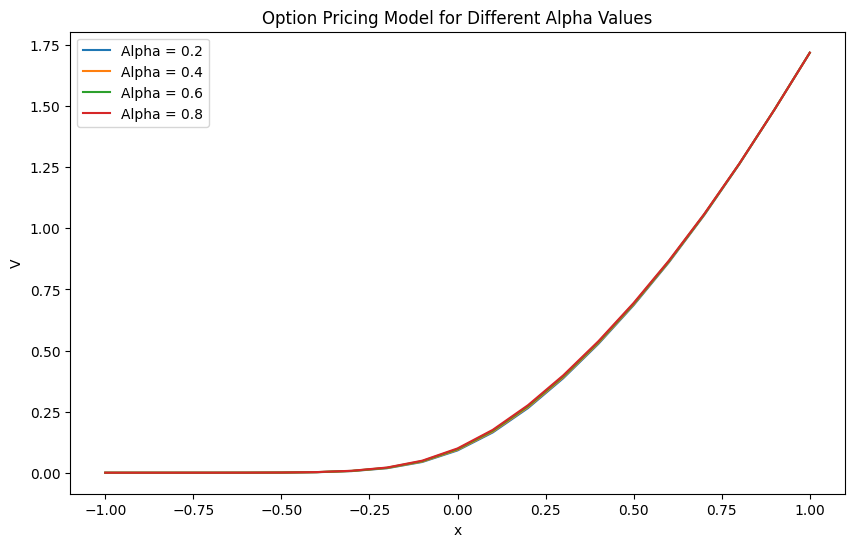

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Simplified parameters (using only one spatial dimension for illustration)
sigma = 0.2
r = 0.05
dx = 0.1
dt = 0.01
T = 1
x_min, x_max = -1, 1
N = int((x_max - x_min) / dx) + 1
M = int(T / dt) + 1

x_values = np.linspace(x_min, x_max, N)

# Initial condition
def initial_condition(x):
    return np.maximum(np.exp(x) - 1, 0)

# Main solver function
def solve_V(alpha):
    A = sigma**2 / 2
    D = (r - sigma**2 / 2) * alpha  # Adjusting D based on alpha for demonstration
    M_coeff = r * alpha  # Adjusting M based on alpha
    
    V = initial_condition(x_values)
    
    for n in range(1, M):
        V_new = np.zeros(N)
        for i in range(1, N-1):
            V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 +
                                    D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
        V_new[0], V_new[-1] = V[0], V[-1]  # Boundary conditions
        V = V_new
    return V

# Plotting for different alpha values
alphas = [0.2, 0.4, 0.6, 0.8]
plt.figure(figsize=(10, 6))

for alpha in alphas:
    V = solve_V(alpha)
    plt.plot(x_values, V, label=f'Alpha = {alpha}')

plt.xlabel('x')
plt.ylabel('V')
plt.title('Option Pricing Model for Different Alpha Values')
plt.legend()
plt.show()


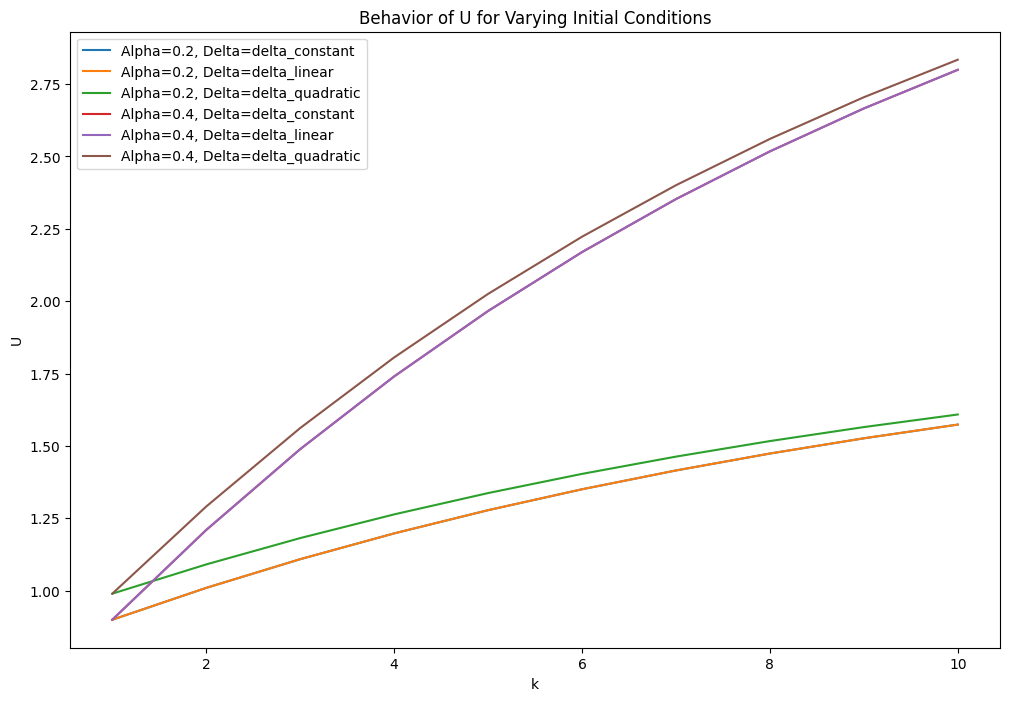

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Define the three delta scenarios
def delta_constant(k):
    return 0.1  # Constant deduction

def delta_linear(k):
    return 0.1 * k  # Linearly increasing deduction

def delta_quadratic(k):
    return 0.01 * k**2  # Quadratically increasing deduction

# Define the initial condition function with variable delta
def initial_condition(k, delta_function):
    return max(1 / factorial(k) - delta_function(k), 0)

# Simplified model for U's next value for demonstration purposes (adjust as necessary)
def next_U_simple(U_prev, k, alpha):
    return U_prev * 0.9 + alpha  # Simplified update rule for demonstration

# Calculate U for a given alpha and delta function
def calculate_U(alpha, delta_function, max_k=10):
    U = np.zeros(max_k)
    for k in range(1, max_k + 1):
        if k == 1:
            U[k-1] = initial_condition(k, delta_function)  # Set initial condition
        else:
            U[k-1] = next_U_simple(U[k-2], k, alpha)  # Update U
    return U

# Plotting
def plot_U(alphas, delta_functions, max_k=10):
    plt.figure(figsize=(12, 8))
    for alpha in alphas:
        for delta_function in delta_functions:
            U = calculate_U(alpha, delta_function, max_k)
            plt.plot(range(1, max_k + 1), U, label=f'Alpha={alpha}, Delta={delta_function.__name__}')

    plt.xlabel('k')
    plt.ylabel('U')
    plt.title('Behavior of U for Varying Initial Conditions')
    plt.legend()
    plt.show()

# Run the plotting function with example alpha values and delta scenarios
alphas = [0.2, 0.4]  # Example alpha values
delta_functions = [delta_constant, delta_linear, delta_quadratic]  # Delta scenarios
plot_U(alphas, delta_functions)


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Parameters (shared between FDM and DTM for consistency)
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
k_bar = 1.0
r = 0.05
dx = 0.1
dt = 0.01
T = 1
x_min, x_max = -1, 1
N = int((x_max - x_min) / dx) + 1
M = int(T / dt) + 1

x_values = np.linspace(x_min, x_max, N)

# Initial condition
def initial_condition(x):
    return np.maximum(np.exp(x) - 1, 0)

# FDM solver function
def solve_V(alpha):
    A = sigma_1**2 / 2
    D = (r - sigma_1**2 / 2) * alpha  # Adjusting D based on alpha for demonstration
    M_coeff = r * alpha  # Adjusting M based on alpha
    
    V = initial_condition(x_values)
    
    for n in range(1, M):
        V_new = np.zeros(N)
        for i in range(1, N-1):
            V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 +
                                    D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
        V_new[0], V_new[-1] = V[0], V[-1]  # Boundary conditions
        V = V_new
    return V

# DTM coefficients
A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = k_bar * rho_12 * sigma_1 * sigma_2
H = k_bar * rho_13 * sigma_1 * sigma_3
I = k_bar * rho_23 * sigma_2 * sigma_3
M_dtm = r

# Simplified delta function
def delta(x):
    return 0.01 * x

# Initial condition function
def initial_condition_dtm(k, h, g):
    return max(1 / np.math.factorial(k) - delta(k), 1 / np.math.factorial(h) - delta(h), 1 / np.math.factorial(g) - delta(g), 0)

# Dimensions for U
dim_k, dim_h, dim_g = 4, 4, 4  # example dimensions

# Initialize U
U = np.zeros((dim_k, dim_h, dim_g))

# Set initial conditions
for k in range(dim_k):
    for h in range(dim_h):
        for g in range(dim_g):
            U[k, h, g] = initial_condition_dtm(k, h, g)
k,h,g = 1,1,1
# DTM solver function
def solve_U(alpha):
    k,h,g = 1,1,1
    # Initialize U
    U = np.zeros((dim_k, dim_h, dim_g))

    # Set initial conditions
    for k in range(dim_k):
        for h in range(dim_h):
            for g in range(dim_g):
                U[k, h, g] = initial_condition_dtm(k, h, g)
    for h in range(1, M):
        U_new = np.zeros(dim_k)
        for k in range(dim_k):
            gamma_ratio = gamma(alpha * (h + 1) + 1) / gamma(alpha * h + 1)
            U_new[k,h,g] = gamma_ratio * (A * (k + 1) * (k + 2) * U[min(k + 2, dim_k-1), h, g] +
                        B * (h + 1) * (h + 2) * U[k, min(h + 2, dim_h-1), g] +
                        C * (g + 1) * (g + 2) * U[k, h, min(g + 2, dim_g-1)] +
                        D * (k + 1) * U[min(k + 1, dim_k-1), h, g] +
                        E * (h + 1) * U[k, min(h + 1, dim_h-1), g] +
                        F * (g + 1) * U[k, h, min(g + 1, dim_g-1)] +
                        G * (k + 1) * (h + 1) * U[min(k + 1, dim_k-1), min(h + 1, dim_h-1), g] +
                        H * (k + 1) * (g + 1) * U[min(k + 1, dim_k-1), h, min(g + 1, dim_g-1)] +
                        I * (h + 1) * (g + 1) * U[k, min(h + 1, dim_h-1), min(g + 1, dim_g-1)] -
                        M_dtm * U[k, h, g])
        U = U_new
    return U

# Plotting for different alpha values
alphas = [0.2, 0.4, 0.6, 0.8]
plt.figure(figsize=(12, 8))

for alpha in alphas:
    V = solve_V(alpha)
    U = solve_U(alpha)
    plt.plot(x_values, V, label=f'FDM Alpha = {alpha}')
    plt.plot(x_values, U, '--', label=f'DTM Alpha = {alpha}')

plt.xlabel('x')
plt.ylabel('Option Price')
plt.title('Comparison of FDM and DTM for Different Alpha Values')
plt.legend()
plt.show()

C:\Users\TheEarthG\AppData\Local\Temp\ipykernel_30972\3574998209.py:58: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return max(1 / np.math.factorial(k) - delta(k), 1 / np.math.factorial(h) - delta(h), 1 / np.math.factorial(g) - delta(g), 0)


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

<Figure size 1200x800 with 0 Axes>

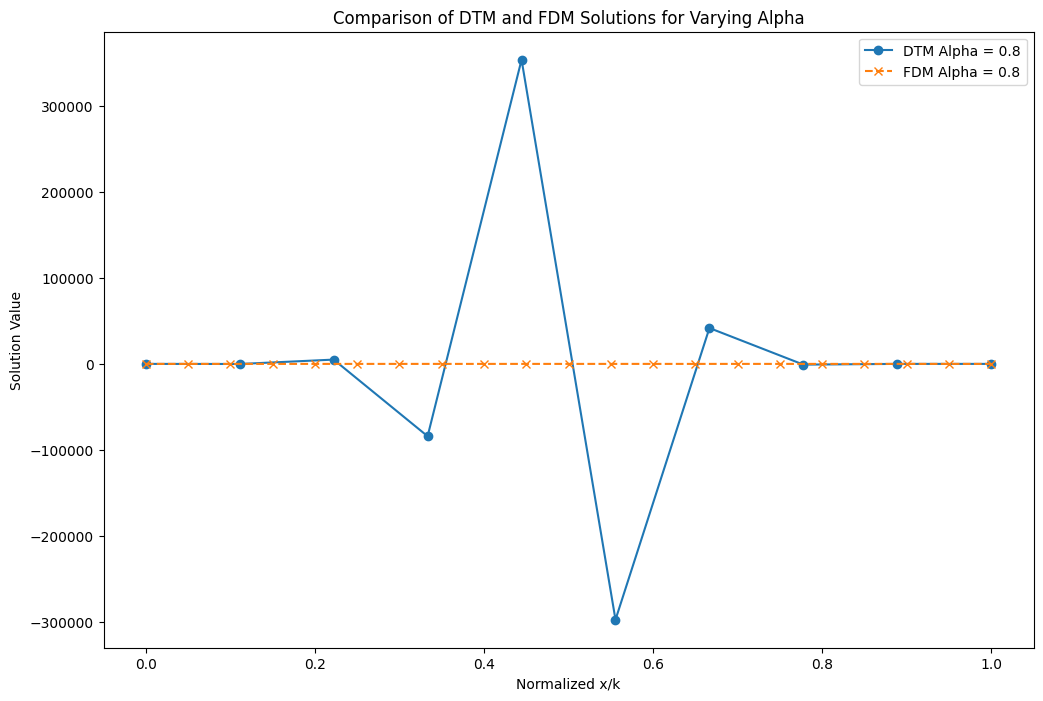

In [18]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

# DTM parameters and functions
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
kappa = 1.0

A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = kappa * rho_12 * sigma_1 * sigma_2
H = kappa * rho_13 * sigma_1 * sigma_3
I = kappa * rho_23 * sigma_2 * sigma_3
M = r

def delta(x):
    return 0.01 * x

def U_initial(k, h, g):
    return max(1/factorial(k) - delta(k), 1/factorial(h) - delta(h), 1/factorial(g) - delta(g), 0)

def next_U(U_prev, k, alpha):
    return ((A + D + G - M) * U_prev + alpha) / gamma(k + 1)

def solve_U(alphas, max_k=10):
    results = {}
    for alpha in alphas:
        U_next = np.zeros(max_k)
        U_next[0] = U_initial(1,1,1)
        for k in range(1, max_k):
            U_next[k] = next_U(U_next[k-1], k, alpha)
        results[alpha] = U_next
    return results

# FDM parameters and functions
sigma = 0.2
dx = 0.1
dt = 0.01
T = 1
x_min, x_max = -1, 1
N = int((x_max - x_min) / dx) + 1
M = int(T / dt) + 1

x_values = np.linspace(x_min, x_max, N)

def initial_condition_fdm(x):
    return np.maximum(np.exp(x) - 1, 0)

def solve_V(alpha):
    A = sigma**2 / 2
    D = (r - sigma**2 / 2) * alpha
    M_coeff = r * alpha
    
    V = initial_condition_fdm(x_values)
    
    for n in range(1, M):
        V_new = np.zeros(N)
        for i in range(1, N-1):
            V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 +
                                    D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
        V_new[0], V_new[-1] = V[0], V[-1]
        V = V_new
    return V

alphas = [0.8]
results_dtm = solve_U(alphas)

# Plotting combined DTM and FDM results
plt.figure(figsize=(12, 8))

for alpha in alphas:
    U_next = results_dtm[alpha]
    V = solve_V(alpha)
    
    norm_k = np.linspace(0, 1, len(U_next))  # Normalized k values
    norm_x = np.linspace(0, 1, len(V))  # Normalized x values
    
    plt.plot(norm_k, U_next + 1, 'o-', label=f'DTM Alpha = {alpha}')
    plt.plot(norm_x, V, 'x--', label=f'FDM Alpha = {alpha}')

plt.xlabel('Normalized x/k')
plt.ylabel('Solution Value')
plt.title('Comparison of DTM and FDM Solutions for Varying Alpha')
plt.legend()
plt.show()

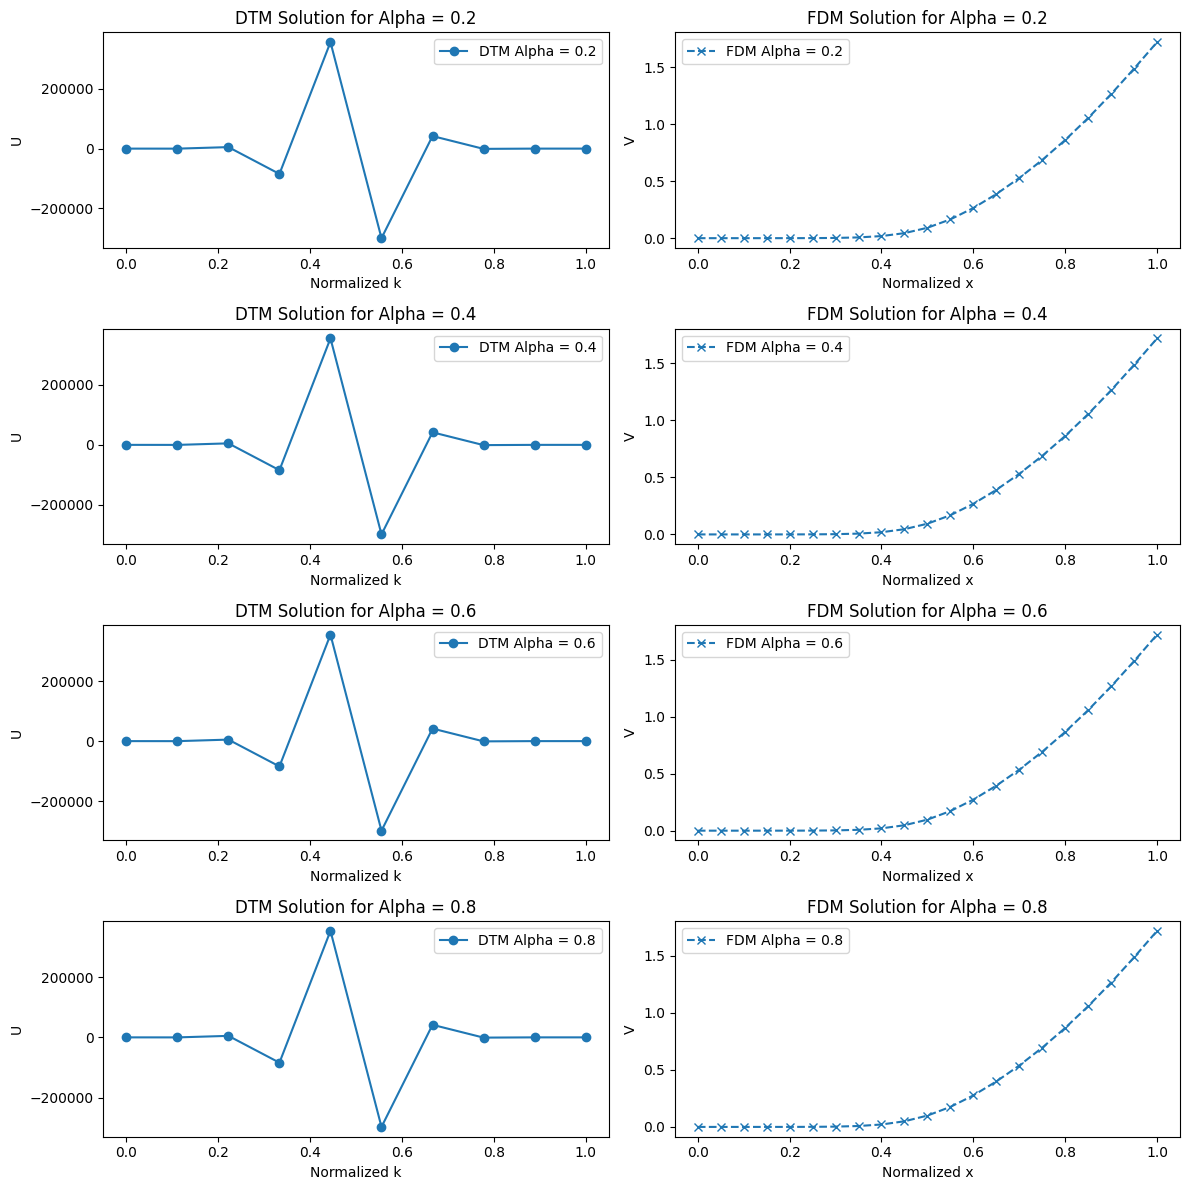

In [19]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

# DTM parameters and functions
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
kappa = 1.0

A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = kappa * rho_12 * sigma_1 * sigma_2
H = kappa * rho_13 * sigma_1 * sigma_3
I = kappa * rho_23 * sigma_2 * sigma_3
M = r

def delta(x):
    return 0.01 * x

def U_initial(k, h, g):
    return max(1/factorial(k) - delta(k), 1/factorial(h) - delta(h), 1/factorial(g) - delta(g), 0)

def next_U(U_prev, k, alpha):
    return ((A + D + G - M) * U_prev + alpha) / gamma(k + 1)

def solve_U(alphas, max_k=10):
    results = {}
    for alpha in alphas:
        U_next = np.zeros(max_k)
        U_next[0] = U_initial(1,1,1)
        for k in range(1, max_k):
            U_next[k] = next_U(U_next[k-1], k, alpha)
        results[alpha] = U_next
    return results

# FDM parameters and functions
sigma = 0.2
dx = 0.1
dt = 0.01
T = 1
x_min, x_max = -1, 1
N = int((x_max - x_min) / dx) + 1
M = int(T / dt) + 1

x_values = np.linspace(x_min, x_max, N)

def initial_condition_fdm(x):
    return np.maximum(np.exp(x) - 1, 0)

def solve_V(alpha):
    A = sigma**2 / 2
    D = (r - sigma**2 / 2) * alpha
    M_coeff = r * alpha
    
    V = initial_condition_fdm(x_values)
    
    for n in range(1, M):
        V_new = np.zeros(N)
        for i in range(1, N-1):
            V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 +
                                    D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
        V_new[0], V_new[-1] = V[0], V[-1]
        V = V_new
    return V

alphas = [0.2, 0.4, 0.6, 0.8]
results_dtm = solve_U(alphas)

# Create subplots
fig, axs = plt.subplots(len(alphas), 2, figsize=(12, 3 * len(alphas)))

for idx, alpha in enumerate(alphas):
    U_next = results_dtm[alpha]
    V = solve_V(alpha)
    
    norm_k = np.linspace(0, 1, len(U_next))  # Normalized k values
    norm_x = np.linspace(0, 1, len(V))  # Normalized x values
    
    # Plot DTM
    axs[idx, 0].plot(norm_k, U_next + 1, 'o-', label=f'DTM Alpha = {alpha}')
    axs[idx, 0].set_xlabel('Normalized k')
    axs[idx, 0].set_ylabel('U')
    axs[idx, 0].set_title(f'DTM Solution for Alpha = {alpha}')
    axs[idx, 0].legend()
    
    # Plot FDM
    axs[idx, 1].plot(norm_x, V, 'x--', label=f'FDM Alpha = {alpha}')
    axs[idx, 1].set_xlabel('Normalized x')
    axs[idx, 1].set_ylabel('V')
    axs[idx, 1].set_title(f'FDM Solution for Alpha = {alpha}')
    axs[idx, 1].legend()

plt.tight_layout()
plt.show()

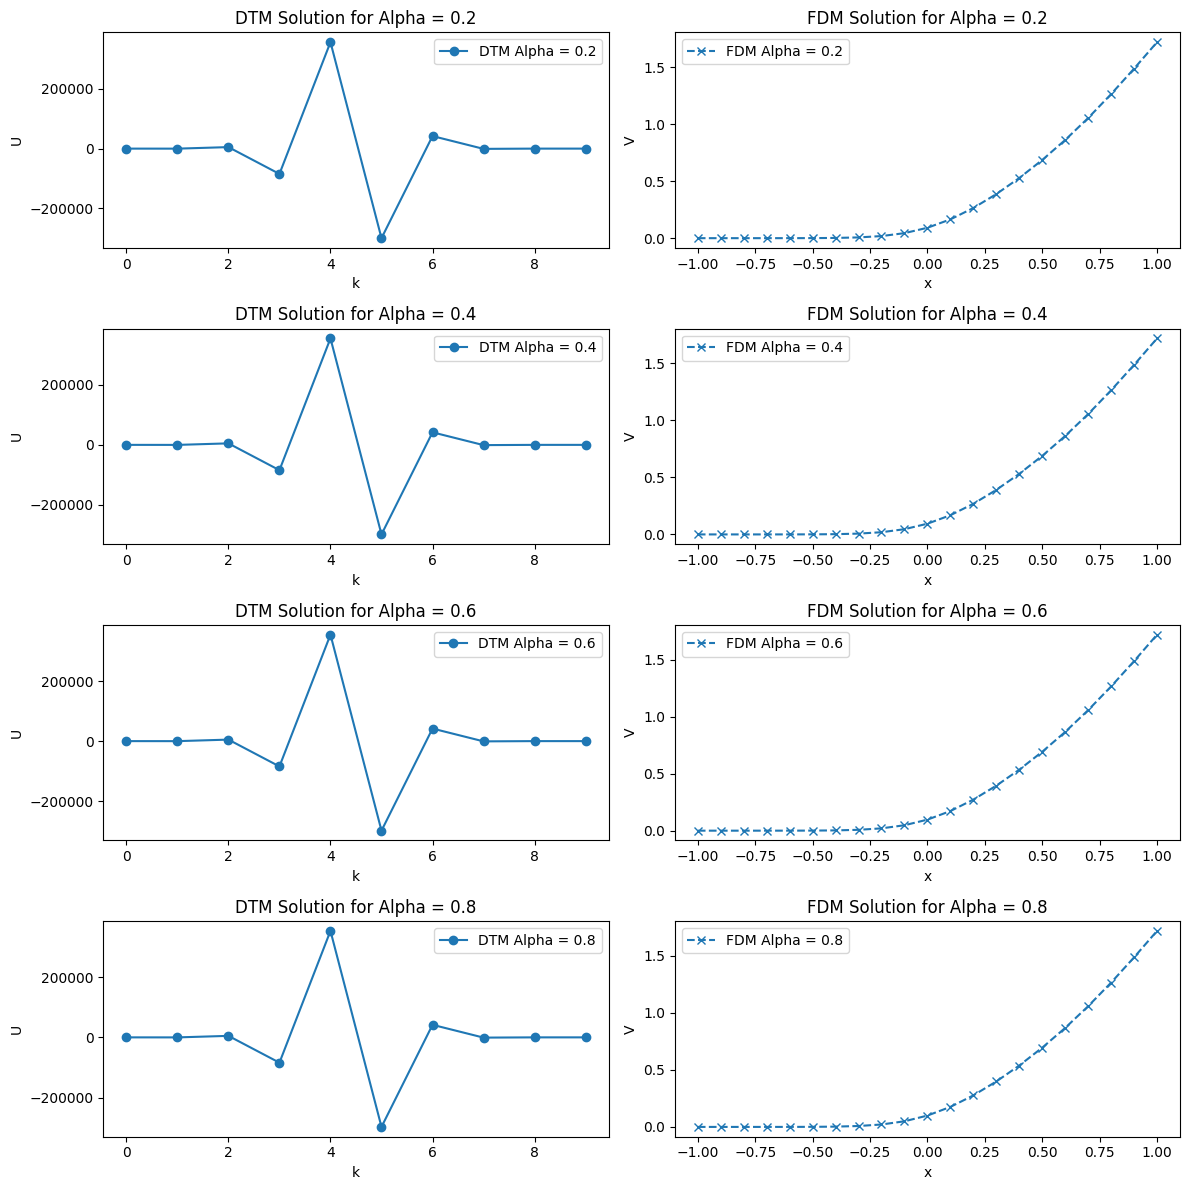

In [20]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

# DTM parameters and functions
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
kappa = 1.0

A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = kappa * rho_12 * sigma_1 * sigma_2
H = kappa * rho_13 * sigma_1 * sigma_3
I = kappa * rho_23 * sigma_2 * sigma_3
M = r

def delta(x):
    return 0.01 * x

def U_initial(k, h, g):
    return max(1/factorial(k) - delta(k), 1/factorial(h) - delta(h), 1/factorial(g) - delta(g), 0)

def next_U(U_prev, k, alpha):
    return ((A + D + G - M) * U_prev + alpha) / gamma(k + 1)

def solve_U(alphas, max_k=10):
    results = {}
    for alpha in alphas:
        U_next = np.zeros(max_k)
        U_next[0] = U_initial(1,1,1)
        for k in range(1, max_k):
            U_next[k] = next_U(U_next[k-1], k, alpha)
        results[alpha] = U_next
    return results

# FDM parameters and functions
sigma = 0.2
dx = 0.1
dt = 0.01
T = 1
x_min, x_max = -1, 1
N = int((x_max - x_min) / dx) + 1
M = int(T / dt) + 1

x_values = np.linspace(x_min, x_max, N)

def initial_condition_fdm(x):
    return np.maximum(np.exp(x) - 1, 0)

def solve_V(alpha):
    A = sigma**2 / 2
    D = (r - sigma**2 / 2) * alpha
    M_coeff = r * alpha
    
    V = initial_condition_fdm(x_values)
    
    for n in range(1, M):
        V_new = np.zeros(N)
        for i in range(1, N-1):
            V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 +
                                    D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
        V_new[0], V_new[-1] = V[0], V[-1]
        V = V_new
    return V

alphas = [0.2, 0.4, 0.6, 0.8]
results_dtm = solve_U(alphas)

# Create subplots
fig, axs = plt.subplots(len(alphas), 2, figsize=(12, 3 * len(alphas)))

for idx, alpha in enumerate(alphas):
    U_next = results_dtm[alpha]
    V = solve_V(alpha)
    
    # Plot DTM
    axs[idx, 0].plot(range(len(U_next)), U_next + 1, 'o-', label=f'DTM Alpha = {alpha}')
    axs[idx, 0].set_xlabel('k')
    axs[idx, 0].set_ylabel('U')
    axs[idx, 0].set_title(f'DTM Solution for Alpha = {alpha}')
    axs[idx, 0].legend()
    
    # Plot FDM
    axs[idx, 1].plot(x_values, V, 'x--', label=f'FDM Alpha = {alpha}')
    axs[idx, 1].set_xlabel('x')
    axs[idx, 1].set_ylabel('V')
    axs[idx, 1].set_title(f'FDM Solution for Alpha = {alpha}')
    axs[idx, 1].legend()

plt.tight_layout()
plt.show()


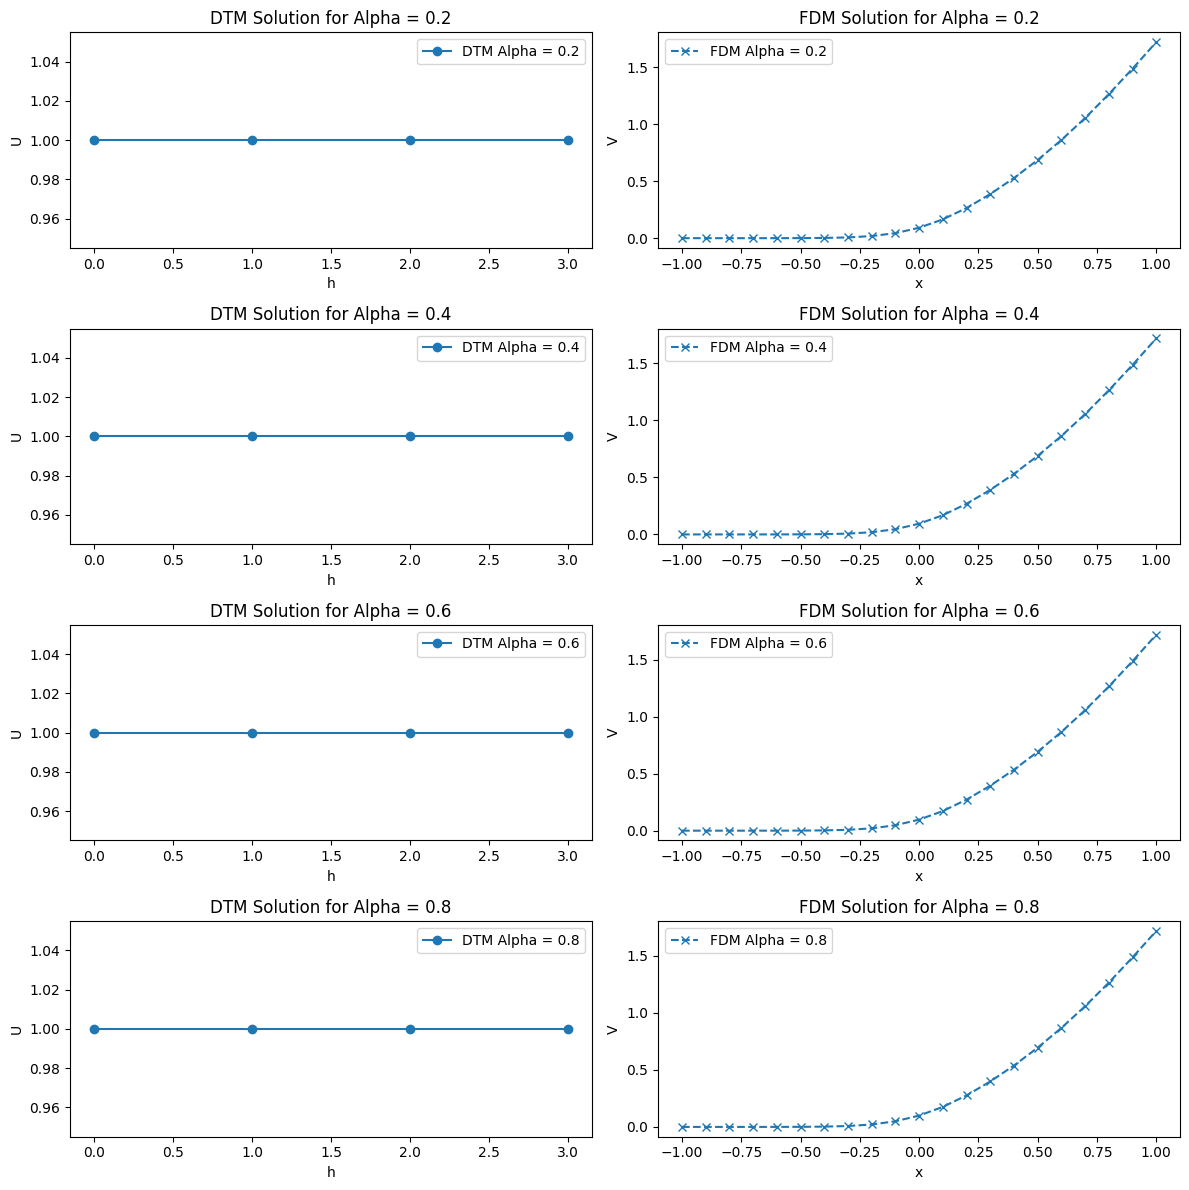

In [25]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

# DTM parameters and functions
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
kappa = 1.0

A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = kappa * rho_12 * sigma_1 * sigma_2
H = kappa * rho_13 * sigma_1 * sigma_3
I = kappa * rho_23 * sigma_2 * sigma_3
M = r

def delta(x):
    return 0.01 * x

def U_initial(k, h, g):
    return max(1/factorial(k) - delta(k), 1/factorial(h) - delta(h), 1/factorial(g) - delta(g), 0)

def solve_U(alphas):
    results = {}
    for alpha in alphas:
        dim_k, dim_h, dim_g = 4, 4, 4
        U = np.zeros((dim_k, dim_h, dim_g))
        for k in range(1, dim_k):
            for h in range(1, dim_h):
                for g in range(1, dim_g):
                    gamma_ratio = gamma(alpha * (h + 1) + 1) / gamma(alpha * h + 1)
                    U[k, h, g] = gamma_ratio * (A * (k + 1) * (k + 2) * U[min(k + 2, dim_k-1), h, g] +
                                                B * (h + 1) * (h + 2) * U[k, min(h + 2, dim_h-1), g] +
                                                C * (g + 1) * (g + 2) * U[k, h, min(g + 2, dim_g-1)] +
                                                D * (k + 1) * U[min(k + 1, dim_k-1), h, g] +
                                                E * (h + 1) * U[k, min(h + 1, dim_h-1), g] +
                                                F * (g + 1) * U[k, h, min(g + 1, dim_g-1)] +
                                                G * (k + 1) * (h + 1) * U[min(k + 1, dim_k-1), min(h + 1, dim_h-1), g] +
                                                H * (k + 1) * (g + 1) * U[min(k + 1, dim_k-1), h, min(g + 1, dim_g-1)] +
                                                I * (h + 1) * (g + 1) * U[k, min(h + 1, dim_h-1), min(g + 1, dim_g-1)] -
                                                M * U[k, h, g])
        results[alpha] = U[:,1,1] 
    return results

# FDM parameters and functions
sigma = 0.2
dx = 0.1
dt = 0.01
T = 1
x_min, x_max = -1, 1
N = int((x_max - x_min) / dx) + 1
M = int(T / dt) + 1

x_values = np.linspace(x_min, x_max, N)

def initial_condition_fdm(x):
    return np.maximum(np.exp(x) - 1, 0)

def solve_V(alpha):
    A = sigma**2 / 2
    D = (r - sigma**2 / 2) * alpha
    M_coeff = r * alpha
    
    V = initial_condition_fdm(x_values)
    
    for n in range(1, M):
        V_new = np.zeros(N)
        for i in range(1, N-1):
            V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 +
                                    D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
        V_new[0], V_new[-1] = V[0], V[-1]
        V = V_new
    return V

alphas = [0.2, 0.4, 0.6, 0.8]
results_dtm = solve_U(alphas)

# Create subplots
fig, axs = plt.subplots(len(alphas), 2, figsize=(12, 3 * len(alphas)))

for idx, alpha in enumerate(alphas):
    U_next = results_dtm[alpha]
    V = solve_V(alpha)
    
    # Plot DTM
    axs[idx, 0].plot(range(len(U_next)), U_next + 1, 'o-', label=f'DTM Alpha = {alpha}')
    axs[idx, 0].set_xlabel('h')
    axs[idx, 0].set_ylabel('U')
    axs[idx, 0].set_title(f'DTM Solution for Alpha = {alpha}')
    axs[idx, 0].legend()
    
    # Plot FDM
    axs[idx, 1].plot(x_values, V, 'x--', label=f'FDM Alpha = {alpha}')
    axs[idx, 1].set_xlabel('x')
    axs[idx, 1].set_ylabel('V')
    axs[idx, 1].set_title(f'FDM Solution for Alpha = {alpha}')
    axs[idx, 1].legend()

plt.tight_layout()
plt.show()
